<a href="https://colab.research.google.com/github/Srikhanth14/Sales_Model/blob/main/Project_4_Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction:**

### In the realm of data-driven decision-making, our project, "Sales Prediction Using Python", employs advanced data analysis and machine learning techniques to forecast sales accurately. By combining the power of Python programming and statistical modeling, this project offers businesses the ability to make informed decisions, optimize advertising strategies, and maximize revenue potential.


## **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Collection and Preprocessing**

In [ ]:
# Load the dataset
df = pd.read_csv('advertising.csv')

In [ ]:
# Display first ten rows of the dataset
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Display the shape of the dataset
print("Number of rows= ", df.shape[0])
print("Number of columns= ", df.shape[1])

Number of rows=  200
Number of columns=  4


In [ ]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Checking for duplicate values
print("Are there any duplicate values = ", df.duplicated().any() )

Are there any duplicate values =  False


In [ ]:
# Statistical Summary of the Dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **Data Visualization**

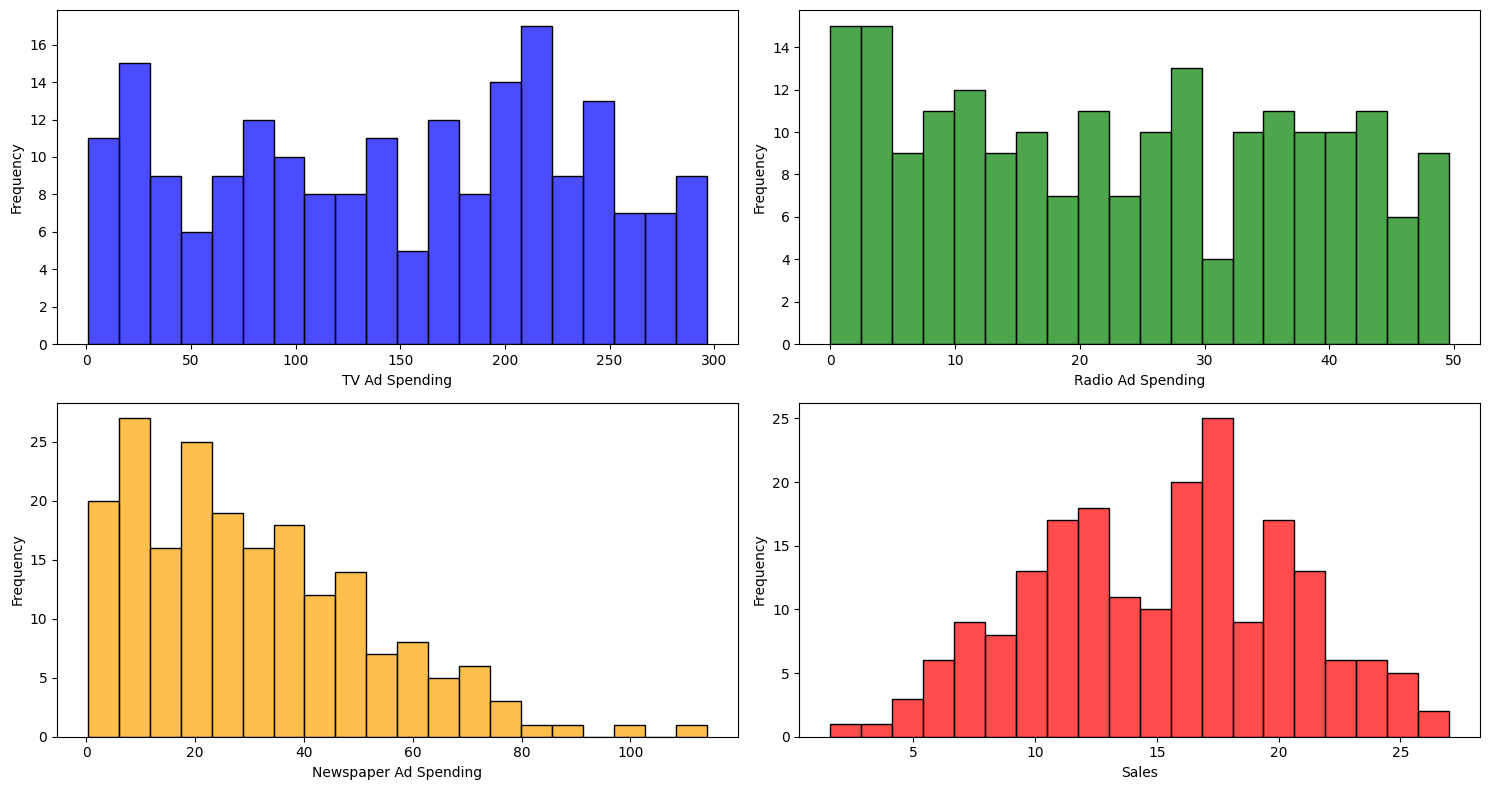

In [ ]:
# Create histograms for TV, Radio, Newspaper, and Sales
# Histograms depict the distribution of TV, Radio, Newspaper advertising expenditures, and Sales.
# They showcase how values are spread across different ranges, helping us grasp patterns and frequencies.
plt.figure(figsize=(15, 8))

plt.subplot(221)
sns.histplot(df['TV'], bins=20, color='blue', alpha=0.7)
plt.xlabel('TV Ad Spending')
plt.ylabel('Frequency')

plt.subplot(222)
sns.histplot(df['Radio'], bins=20, color='green' , alpha=0.7)
plt.xlabel('Radio Ad Spending')
plt.ylabel('Frequency')

plt.subplot(223)
sns.histplot(df['Newspaper'], bins=20, color='orange',  alpha=0.7)
plt.xlabel('Newspaper Ad Spending')
plt.ylabel('Frequency')

plt.subplot(224)
sns.histplot(df['Sales'], bins=20, color='red', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the total expenditure for each medium
total_tv_expenditure = df['TV'].sum()
total_radio_expenditure = df['Radio'].sum()
total_newspaper_expenditure = df['Newspaper'].sum()

print('Total expenditure of TV= ',total_tv_expenditure)
print('Total expenditure of Radio= ',total_radio_expenditure)
print('Total expenditure of Newspaper= ',total_newspaper_expenditure)

Total expenditure of TV=  29408.5
Total expenditure of Radio=  4652.800000000001
Total expenditure of Newspaper=  6110.799999999999


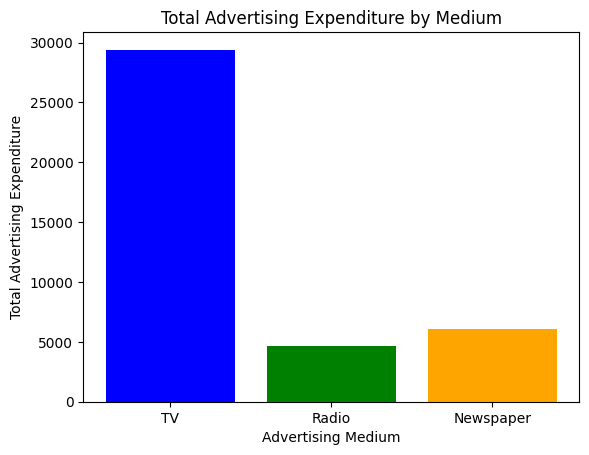

In [ ]:
# Create a bar chart
# This bar chart illustrates the total spending on advertising across TV, Radio, and Newspaper mediums. It provides an overview of the overall advertising budget allocation.
mediums = ['TV', 'Radio', 'Newspaper']
expenditures = [total_tv_expenditure, total_radio_expenditure,total_newspaper_expenditure]
plt.bar(mediums, expenditures, color=['blue', 'green', 'orange'])
plt.xlabel('Advertising Medium')
plt.ylabel('Total Advertising Expenditure')
plt.title('Total Advertising Expenditure by Medium')
plt.show()

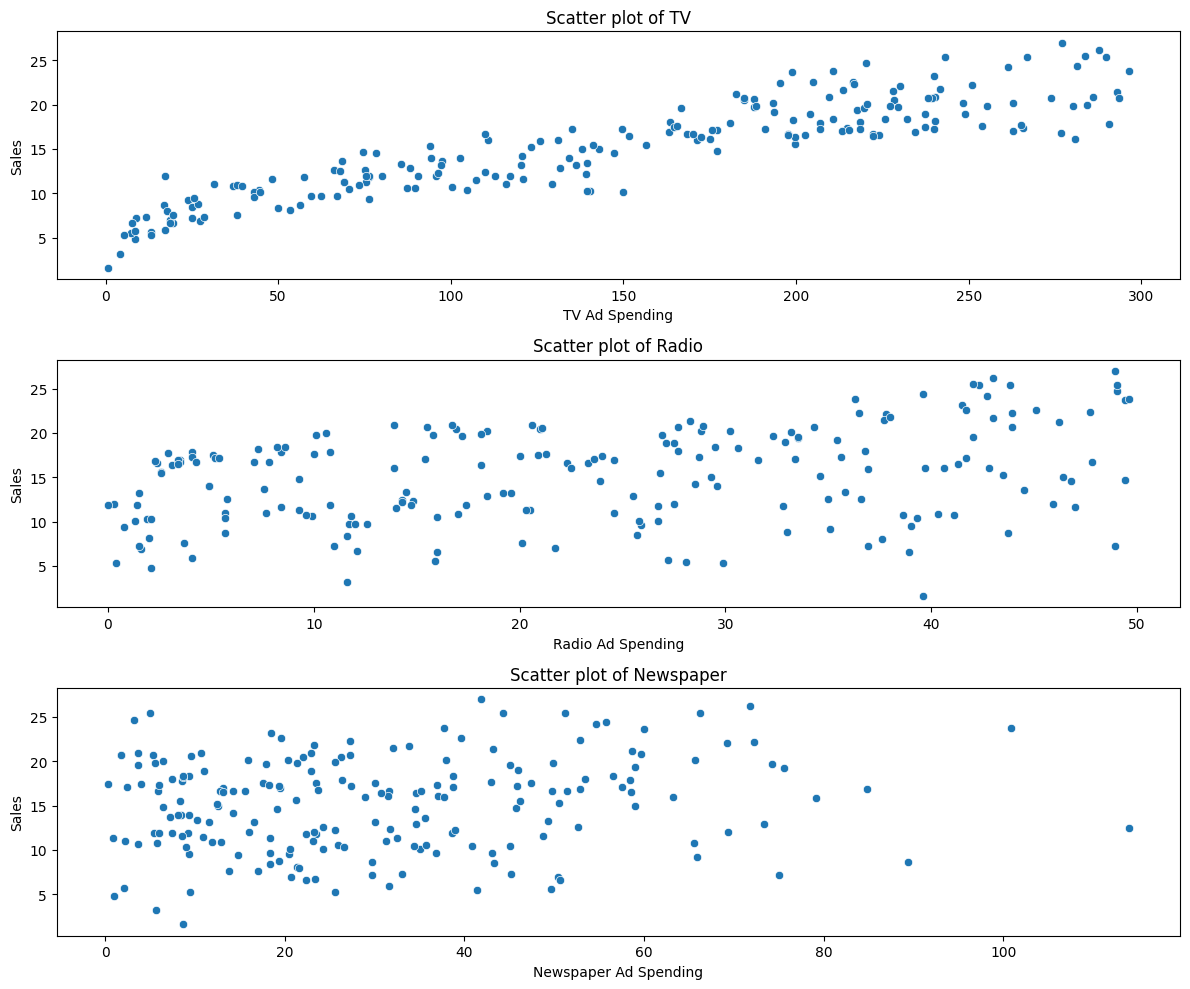

In [ ]:
# Create Scatter plot for TV, Radio, Newspaper based on Sales
# Scatter plots visualize the relationship between each advertising medium (TV, Radio, Newspaper) and Sales.
# They help us understand how changes in advertising spending influence sales figures.
plt.figure(figsize=(12, 10))

plt.subplot(311)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("Scatter plot of TV")
plt.xlabel("TV Ad Spending")
plt.ylabel("Sales")

plt.subplot(312)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title("Scatter plot of Radio")
plt.xlabel("Radio Ad Spending")
plt.ylabel("Sales")

plt.subplot(313)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title("Scatter plot of Newspaper")
plt.xlabel("Newspaper Ad Spending")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

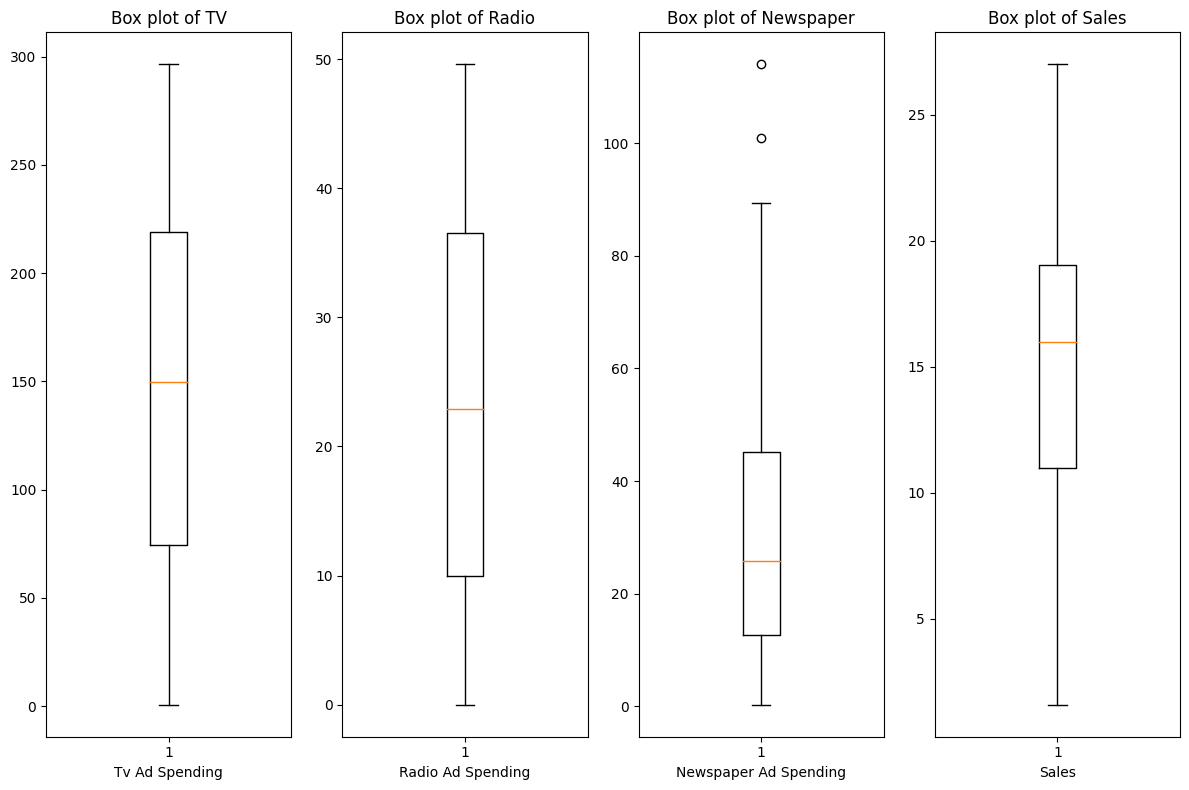

In [ ]:
# Create box plot for TV, Radio and Newspaper based on Sales
# These boxplots visualize spending on TV, Radio, Newspaper advertising, and Sales.
# They provide a quick summary, showing medians, spreads, and potential outliers, aiding our understanding of each variable's distribution.

plt.figure(figsize=(12,8))

plt.subplot(141)
plt.boxplot(df['TV'])
plt.title("Box plot of TV")
plt.xlabel("Tv Ad Spending")

plt.subplot(142)
plt.boxplot(df['Radio'])
plt.title("Box plot of Radio")
plt.xlabel("Radio Ad Spending")

plt.subplot(143)
plt.boxplot(df['Newspaper'])
plt.title("Box plot of Newspaper")
plt.xlabel("Newspaper Ad Spending")

plt.subplot(144)
plt.boxplot(df['Sales'])
plt.title("Box plot of Sales")
plt.xlabel("Sales")

plt.tight_layout()
plt.show()

In [ ]:
#Correlation Matrix
correlation_matrix=df.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


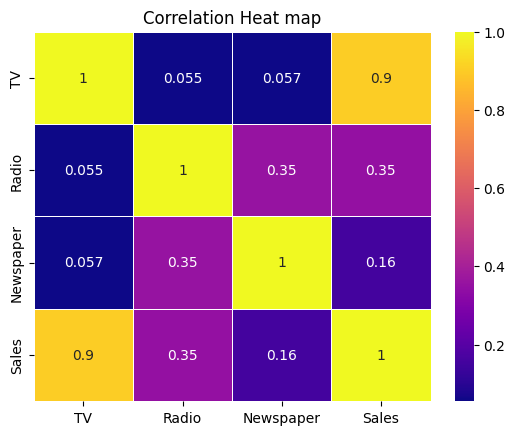

In [ ]:
# The correlation heatmap visually represents the relationships between variables.
# It shows how strongly each variable is related to others, providing valuable insights for decision-making.
sns.heatmap(df.corr(), annot=True, lw=.5, cmap='plasma')
plt.title("Correlation Heat map")
plt.show()

## **Model Selection and Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Splitting the Feature and Target
X = df.drop('Sales', axis=1)
Y = df.Sales

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Train and Test Data Shapes:")
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train and Test Data Shapes:
(160, 3) (40, 3) (160,) (40,)


In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
Y_pred_test = model.predict(X_test)
Y_pred_test

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [ ]:
# Evaluate the model on Test Data
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)

print('Model Evaluation based on Test Data \n')
print("Mean Squared Error: ",mse_test)
print("R-squared: ",r2_test)

Model Evaluation based on Test Data 

Mean Squared Error:  2.9077569102710896
R-squared:  0.9059011844150826


In [ ]:
# Make predictions on the train data
Y_pred_train = model.predict(X_train)
Y_pred_train

array([11.91465765, 15.32881375,  9.91093345,  9.46132618, 17.23412363,
        7.22972412, 10.35454191, 15.23876611, 11.14036535, 11.71856758,
       13.85060866, 14.66570876, 10.44983379,  9.28550764,  9.02357336,
       12.47875166, 10.48712079, 24.99748731,  7.88523289, 15.8640533 ,
       21.30888748, 17.00814942, 12.79206695,  9.84041429, 21.01070892,
        7.48343928, 23.52204082,  7.05636619, 12.56968457, 10.08676368,
       11.1715446 ,  9.12566707, 16.92180225, 17.90167068, 15.63428805,
       18.26514616, 15.51584207, 19.23176429, 17.48701831, 21.82555114,
       10.58560762, 14.22101675, 10.75778538, 18.10690693,  9.94580615,
       17.38762989, 13.21321157, 23.7057409 , 11.04124955, 23.50498043,
        7.25377772, 19.17388849, 24.9725586 , 21.21199698, 18.85730214,
       16.49383903, 13.90044002, 11.26132856, 19.58689909, 15.32197517,
       15.91287266, 10.29394498, 20.24916557, 12.59260311, 21.37507598,
       11.62060518,  9.00761916, 19.44123849, 15.85637182, 18.57

In [ ]:
# Evaluate the model on Train Data
mse_train = mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train, Y_pred_train)

print('Model Evaluation based on Train Data \n')
print("Mean Squared Error: ",mse_train)
print("R-squared: ",r2_train)

Model Evaluation based on Train Data 

Mean Squared Error:  2.676142653782669
R-squared:  0.9001416005862131


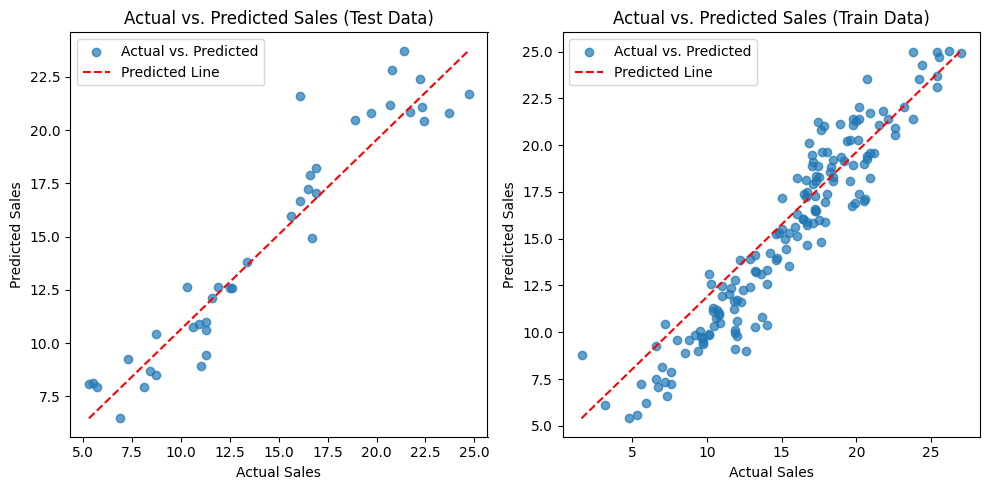

In [ ]:
# Plot the actual vs. predicted sales values for the test data and Train Data

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.scatter(Y_test, Y_pred_test, label="Actual vs. Predicted", alpha=0.7)
# Add the line representing the predicted values
plt.plot([min(Y_test), max(Y_test)], [min(Y_pred_test), max(Y_pred_test)], linestyle='--', color='red', label="Predicted Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Test Data)")
plt.legend()

plt.subplot(122)
plt.scatter(Y_train, Y_pred_train, label="Actual vs. Predicted", alpha=0.7)
# Add the line representing the predicted values
plt.plot([min(Y_train), max(Y_train)], [min(Y_pred_train), max(Y_pred_train)], linestyle='--', color='red', label="Predicted Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Train Data)")
plt.legend()


plt.tight_layout()
plt.show()

## **Building Predicitve System**

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# User input for predictive system
input_data = (230.1,	37.8,	69.2)

# Reshape the input data as you are predicting for only one instance
input_data_reshaped = np.asarray(input_data).reshape(1, -1)

# Make predictions using the trained sales prediction model
input_data_reshaped=pd.DataFrame(input_data_reshaped,columns=X_train.columns)

predicted_sales = model.predict(input_data_reshaped)

# Display the prediction result
print("Predicted Sales: ", predicted_sales)

Predicted Sales:  [21.37254028]


In [ ]:
# Defining threshold value
threshold = df['Sales'].mean()
threshold

15.130500000000001

In [ ]:
# Display Prediction Result
if predicted_sales >= threshold:
  print("The predicted sales are high.")
else:
  print("The predicted sales are low.")

The predicted sales are high.


# **Saving the Trained Model**

In [ ]:
import pickle as pic

In [ ]:
filename="Sales_Trained_Model.sav"
pic.dump(model,open(filename,'wb'))

In [ ]:
loaded_model=pic.load(open(filename,'rb'))

In [ ]:
# User input for predictive system
input_data = (230.1,	37.8,	69.2)

# Reshape the input data as you are predicting for only one instance
input_data_reshaped = np.asarray(input_data).reshape(1, -1)

# Make predictions using the trained sales prediction model
input_data_reshaped=pd.DataFrame(input_data_reshaped,columns=X_train.columns)

predicted_sales = loaded_model.predict(input_data_reshaped)

# Display the prediction result
print("Predicted Sales: ", predicted_sales)

Predicted Sales:  [21.37254028]


## **Project Summary**

### The "Sales Prediction Using Python" project seamlessly integrates data preprocessing, informative data visualization, and a robust linear regression model. This comprehensive approach results in a user-friendly predictive system. Businesses can leverage this tool to make informed decisions, refine marketing strategies, and dynamically respond to evolving market conditions. To explore the project interactively, I've crafted a dedicated web app using Streamlit. You can access the app [here](https://sales-advertising-prediction.streamlit.app)